##Импорты

In [ ]:
import os
import json
import requests
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
from datetime import datetime
from collections import Counter, defaultdict
import tensorflow as tf
from tensorflow import keras

##Модель Xception

In [ ]:
loadedModel = load_model('C:/Users/LazSa/Downloads/NeuralLab1/ModelXception.keras')
def predict_image(img, model):

    img = img.convert("RGB")

    img_resized = img.resize((299, 299))
    img_array = image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    confidence = predictions[0][class_idx]

    classes = ['Draw', 'Generate', 'Real']
    predicted_class = classes[class_idx]


    #plt.imshow(img_resized)
    #plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
    #plt.axis('off')
    #plt.show()

    return predicted_class, confidence

##Предобработка данных

In [ ]:

json_file_path = 'C:/Users/LazSa/Downloads/NeuralLab1/VDatabase/users.json'


with open(json_file_path, 'r', encoding='utf-8') as f:
    users = json.load(f)

In [ ]:
current_year = datetime.now().year

dataset_origin = {}

for user in users:
    if 'bdate' in user and user.get('crop_photo') and user['bdate'] is not None:
        try:
            birth_year = int(user['bdate'].split('.')[-1])
            age = current_year - birth_year

            if 14 <= age <= 35:
                avatar_url = user.get('photo_max')
                response = requests.get(avatar_url)

                if response.status_code == 200:
                    dataset_origin[user['id']] = user
                else:
                    print(f"URL недоступен для пользователя с ID {user['id']}")

        except Exception as e:
            print(f"Ошибка при обработке пользователя с ID {user['id']}: {e}")

print(f"Количество пользователей после фильтрации: {len(dataset_origin)}")

URL недоступен для пользователя с ID 6f4a6612-43ca-4151-9108-3919271fe9de
URL недоступен для пользователя с ID ebfbe61d-edcf-4a7e-ade9-8da527007960
Количество пользователей после фильтрации: 4627


В результате предобработки мы создали словарик с 4627 "живыми" пользователями, являющиеся молодежной группой согласно предписаниям РФ (14-35 лет) и наличием аватара в профиле, а также доступности аватара по ссылке.

In [ ]:
with open('C:/Users/LazSa/Downloads/NeuralLab1/ds_origin.json', 'w', encoding='utf-8') as f:
    json.dump(dataset_origin, f, ensure_ascii=False, indent=4)

print("Данные сохранены в файл ds_origin.json")

Данные сохранены в файл ds_origin.json


##Каково частотное распределение различных видов аватаров в молодежной группе пользователей ВК?

In [ ]:

json_file_path = 'C:/Users/LazSa/Downloads/NeuralLab1/ds_origin.json'

with open(json_file_path, 'r', encoding='utf-8') as f:
    dataset_origin = json.load(f)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

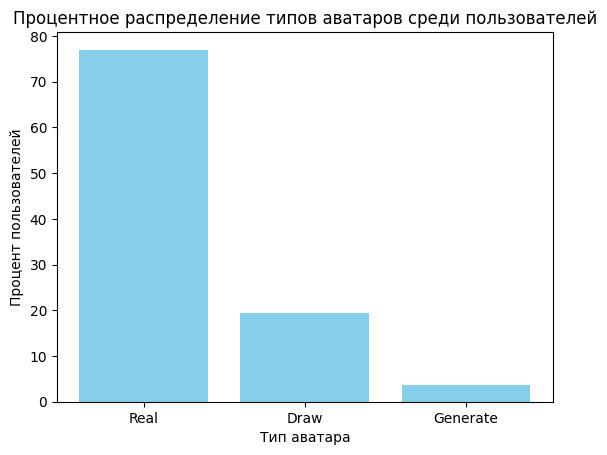

In [ ]:
avatar_predictions = []

for user_id, user_data in dataset_origin.items():
    avatar_url = user_data.get('photo_max')

    if avatar_url:
        response = requests.get(avatar_url)

        if response.status_code == 200:
            try:
                img = Image.open(BytesIO(response.content))

                predicted_class, _ = predict_image(img, loadedModel)
                avatar_predictions.append(predicted_class)

            except Exception as e:
                print(f"Ошибка при обработке изображения для пользователя с ID {user_id}: {e}")

avatar_counts = Counter(avatar_predictions)

print("Количество пользователей по категориям (в соответствии с предсказаниями):")
for avatar, count in avatar_counts.items():
    print(f"{avatar}: {count} пользователей")

total_users = len(dataset_origin)
percent_avatar = {avatar: (count / total_users) * 100 for avatar, count in avatar_counts.items()}

plt.bar(percent_avatar.keys(), percent_avatar.values(), color='skyblue')
plt.xlabel('Тип аватара')
plt.ylabel('Процент пользователей')
plt.title('Процентное распределение типов аватаров среди пользователей')
plt.show()

In [ ]:
for user_id, predicted_class in zip(dataset_origin.keys(), avatar_predictions):
    dataset_origin[user_id]['predicted_avatar_class'] = predicted_class

with open('C:/Users/LazSa/Downloads/NeuralLab1/ds_with_predictions.json', 'w', encoding='utf-8') as f:
    json.dump(dataset_origin, f, ensure_ascii=False, indent=4)

print(f"Данные с предсказаниями сохранены в {'C:/Users/LazSa/Downloads/NeuralLab1/ds_with_predictions.json'}")

Данные с предсказаниями сохранены в C:/Users/LazSa/Downloads/NeuralLab1/ds_with_predictions.json


Как мы можем заметить из общего соотношения реальные фотографии намного предпочтительней (примерно 75%), нежели рисунки (20%) и сгенерированные или обработанные фотографии (5%).

##Существуют ли гендерные различия в частотном распределении?

In [ ]:
json_file_path = 'C:/Users/LazSa/Downloads/NeuralLab1/ds_with_predictions.json'

with open(json_file_path, 'r', encoding='utf-8') as f:
    dataset_with_predictions = json.load(f)

Точное количество пользователей по категориям (с учетом пола):

Female:
  Real: 1491 пользователей
  Draw: 268 пользователей
  Generate: 71 пользователей

Male:
  Real: 2071 пользователей
  Draw: 629 пользователей
  Generate: 97 пользователей

Процентное распределение пользователей по категориям (с учетом пола):

Female:
  Real: 81.48% пользователей
  Draw: 14.64% пользователей
  Generate: 3.88% пользователей

Male:
  Real: 74.04% пользователей
  Draw: 22.49% пользователей
  Generate: 3.47% пользователей


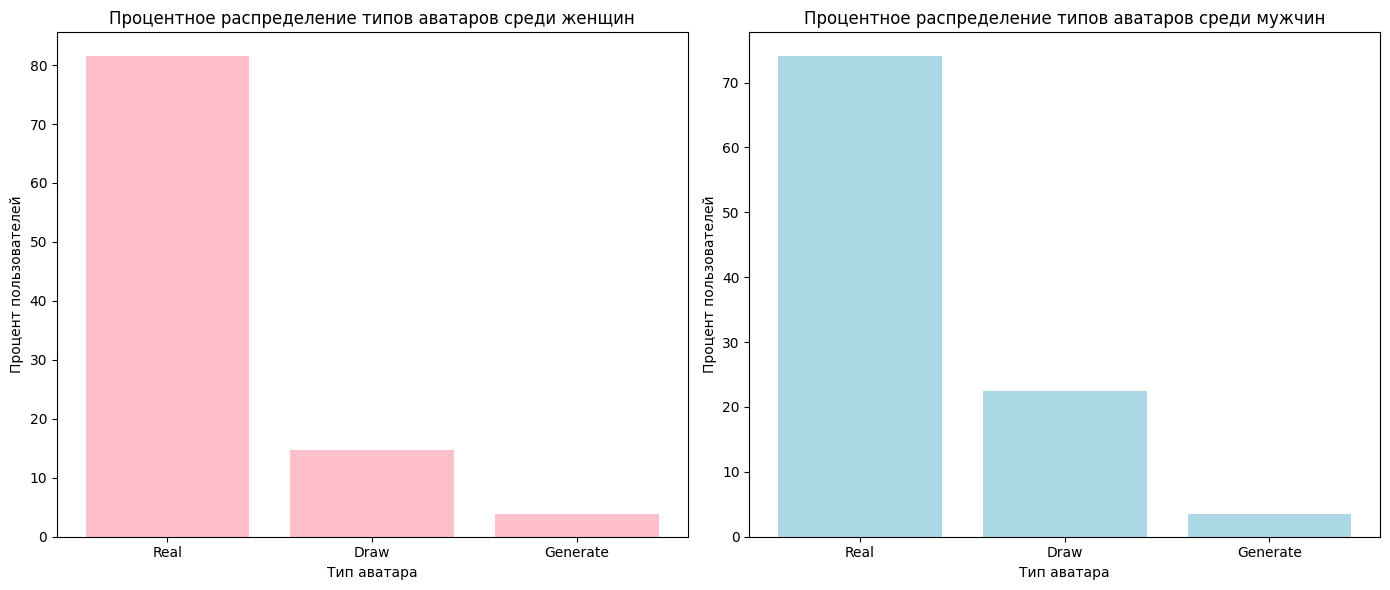

In [ ]:
gender_avatar_counts = {'female': Counter(), 'male': Counter()}

for user_id, user_data in dataset_with_predictions.items():
    if 'predicted_avatar_class' in user_data and 'sex' in user_data:
        gender = 'female' if user_data['sex'] == 1 else 'male'
        avatar_class = user_data['predicted_avatar_class']
        gender_avatar_counts[gender][avatar_class] += 1

total_female = sum(gender_avatar_counts['female'].values())
total_male = sum(gender_avatar_counts['male'].values())

percent_avatar_gender = {
    'female': {avatar: (count / total_female) * 100 for avatar, count in gender_avatar_counts['female'].items()},
    'male': {avatar: (count / total_male) * 100 for avatar, count in gender_avatar_counts['male'].items()},
}

print("Точное количество пользователей по категориям (с учетом пола):")
for gender, counts in gender_avatar_counts.items():
    print(f"\n{gender.capitalize()}:")
    for avatar, count in counts.items():
        print(f"  {avatar}: {count} пользователей")

print("\nПроцентное распределение пользователей по категориям (с учетом пола):")
for gender, percent_counts in percent_avatar_gender.items():
    print(f"\n{gender.capitalize()}:")
    for avatar, percent in percent_counts.items():
        print(f"  {avatar}: {percent:.2f}% пользователей")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(percent_avatar_gender['female'].keys(), percent_avatar_gender['female'].values(), color='pink')
ax[0].set_title('Процентное распределение типов аватаров среди женщин')
ax[0].set_xlabel('Тип аватара')
ax[0].set_ylabel('Процент пользователей')

ax[1].bar(percent_avatar_gender['male'].keys(), percent_avatar_gender['male'].values(), color='lightblue')
ax[1].set_title('Процентное распределение типов аватаров среди мужчин')
ax[1].set_xlabel('Тип аватара')
ax[1].set_ylabel('Процент пользователей')

plt.tight_layout()
plt.show()

Далее мы видим, что даже по гендерным предпочтениям выигрывают реальные фотографии как у мужчин (74%), так и у женщин (82%).

##Существуют ли различия, связанные с типом образования пользователя (техническое, естественнонаучное, гуманитарное)?

In [ ]:
fields_to_keep = {'id', 'bdate', 'predicted_avatar_class', 'universities',
                  'university', 'university_name', 'sex'}

cleaned_data = {}
for user_id, user_data in dataset_with_predictions.items():
    if user_data.get('universities'):
        if any('faculty_name' in uni for uni in user_data.get('universities', [])):
            cleaned_user_data = {key: value for key, value in user_data.items() if key in fields_to_keep}
            cleaned_data[user_id] = cleaned_user_data

with open('C:/Users/LazSa/Downloads/NeuralLab1/ds_with_predictions_cleaned.json', 'w', encoding='utf-8') as f:
    json.dump(cleaned_data, f, ensure_ascii=False, indent=4)

print("Файл успешно очищен и сохранен.")

Файл успешно очищен и сохранен.


In [ ]:
json_file_path = 'C:/Users/LazSa/Downloads/NeuralLab1/ds_with_predictions_cleaned.json'

with open(json_file_path, 'r', encoding='utf-8') as f:
    cleaned_data = json.load(f)
num_records = len(cleaned_data)
print(f"Количество записей в новом датасете: {num_records}")

Количество записей в новом датасете: 273


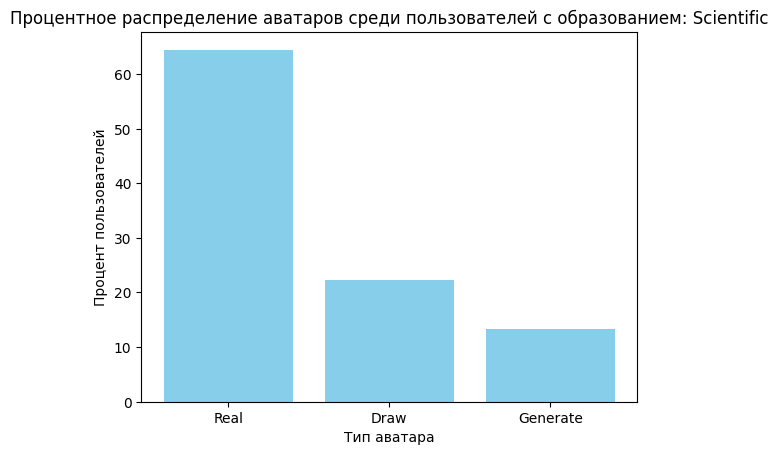

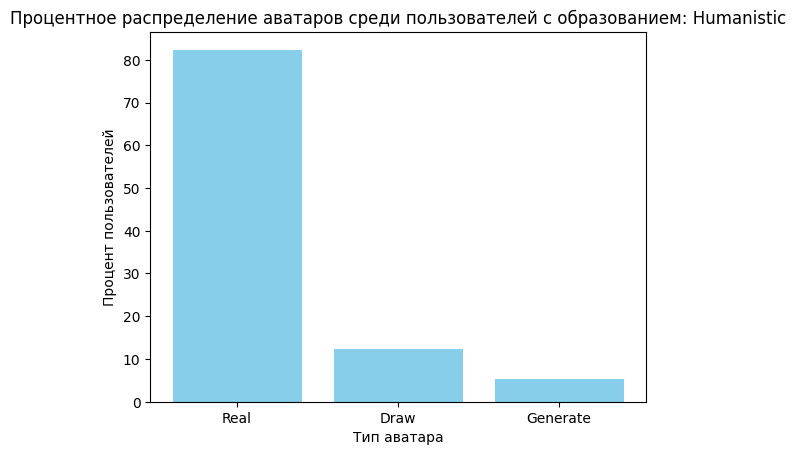

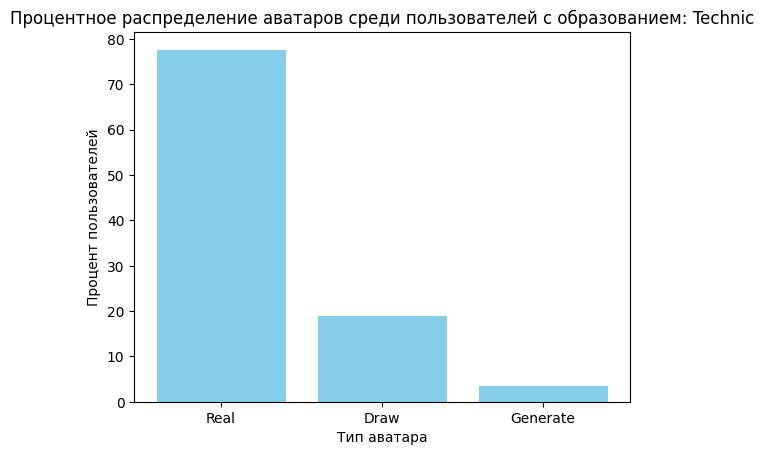


Категория образования: Scientific
Real: 29 пользователей (64.44%)
Draw: 10 пользователей (22.22%)
Generate: 6 пользователей (13.33%)

Категория образования: Humanistic
Real: 140 пользователей (82.35%)
Draw: 21 пользователей (12.35%)
Generate: 9 пользователей (5.29%)

Категория образования: Technic
Real: 45 пользователей (77.59%)
Draw: 11 пользователей (18.97%)
Generate: 2 пользователей (3.45%)

Категория образования: Scientific
Real: 29 пользователей
Draw: 10 пользователей
Generate: 6 пользователей

Категория образования: Humanistic
Real: 140 пользователей
Draw: 21 пользователей
Generate: 9 пользователей

Категория образования: Technic
Real: 45 пользователей
Draw: 11 пользователей
Generate: 2 пользователей


In [ ]:
distribution = defaultdict(Counter)

for user_data in cleaned_data.values():
    university_class = user_data.get('university_class')
    avatar_class = user_data.get('predicted_avatar_class')

    if university_class and avatar_class and avatar_class != "Unknown":
        distribution[university_class][avatar_class] += 1

for university_class, avatar_counts in distribution.items():
    total_users_in_class = sum(avatar_counts.values())
    percent_avatar_counts = {avatar: (count / total_users_in_class) * 100 for avatar, count in avatar_counts.items()}

    plt.figure()
    plt.bar(percent_avatar_counts.keys(), percent_avatar_counts.values(), color='skyblue')
    plt.xlabel('Тип аватара')
    plt.ylabel('Процент пользователей')
    plt.title(f'Процентное распределение аватаров среди пользователей с образованием: {university_class}')
    plt.show()

for university_class, avatar_counts in distribution.items():
    total_users_in_class = sum(avatar_counts.values())
    print(f"\nКатегория образования: {university_class}")
    for avatar_class, count in avatar_counts.items():
        percentage = (count / total_users_in_class) * 100
        print(f"{avatar_class}: {count} пользователей ({percentage:.2f}%)")
for university_class, avatar_counts in distribution.items():
    print(f"\nКатегория образования: {university_class}")
    for avatar_class, count in avatar_counts.items():
        print(f"{avatar_class}: {count} пользователей")

Сильных различий в зависимости от образования не наблюдается. В основном преобладает реальная фотография на аватаре.

##Каковы статистически достоверные предпочтения в выборе аватара в общей выборке, какие предпочтения у пользователей возраста 18-25 лет?

In [ ]:
json_file_path = 'C:/Users/LazSa/Downloads/NeuralLab1/ds_with_predictions.json'

with open(json_file_path, 'r', encoding='utf-8') as f:
    dataset_origin = json.load(f)

Распределение типов аватаров для пользователей 18-25 лет:
Real: 1580 пользователей
Draw: 492 пользователей
Generate: 38 пользователей


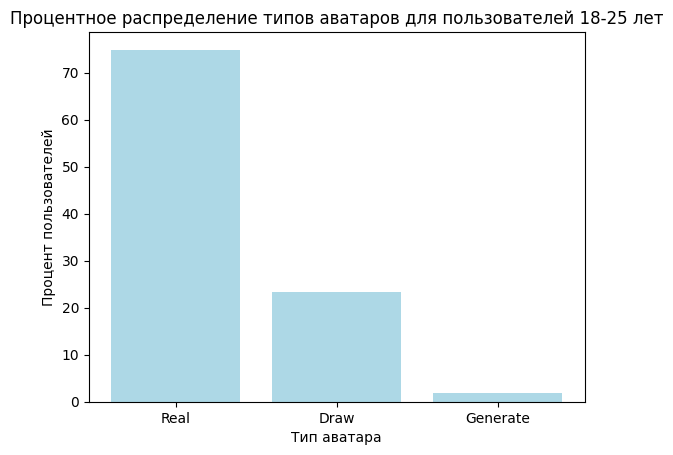

In [ ]:
current_year = datetime.now().year

filtered_data = {}
for user_id, user_data in dataset_origin.items():
    if 'bdate' in user_data:
        try:
            birth_year = int(user_data['bdate'].split('.')[-1])
            age = current_year - birth_year
            if 18 <= age <= 25:
                filtered_data[user_id] = user_data
        except ValueError:
            continue

avatar_counts = Counter(user['predicted_avatar_class'] for user in filtered_data.values() if 'predicted_avatar_class' in user)

print("Распределение типов аватаров для пользователей 18-25 лет:")
for avatar, count in avatar_counts.items():
    print(f"{avatar}: {count} пользователей")

total_users = sum(avatar_counts.values())
percent_avatar_counts = {avatar: (count / total_users) * 100 for avatar, count in avatar_counts.items()}

plt.figure()
plt.bar(percent_avatar_counts.keys(), percent_avatar_counts.values(), color='lightblue')
plt.xlabel('Тип аватара')
plt.ylabel('Процент пользователей')
plt.title('Процентное распределение типов аватаров для пользователей 18-25 лет')
plt.show()

In [ ]:
with open('C:/Users/LazSa/Downloads/NeuralLab1/ds_filtered_18_25.json', 'w', encoding='utf-8') as f:
    json.dump(filtered_data, f, ensure_ascii=False, indent=4)

В данном случае так же преобладают реальные фотографии на аватарах, как и в общей выборке.

##Каковы предпочтения в мужской и женской группах выборки?

In [ ]:
with open('C:/Users/LazSa/Downloads/NeuralLab1/ds_filtered_18_25.json', 'r', encoding='utf-8') as f:
    ds_filtered_18_25 = json.load(f)

Точное количество пользователей по категориям (с учетом пола):

Female:
  Real: 688 пользователей
  Draw: 156 пользователей
  Generate: 19 пользователей

Male:
  Real: 892 пользователей
  Draw: 336 пользователей
  Generate: 19 пользователей

Процентное распределение пользователей по категориям (с учетом пола):

Female:
  Real: 79.72% пользователей
  Draw: 18.08% пользователей
  Generate: 2.20% пользователей

Male:
  Real: 71.53% пользователей
  Draw: 26.94% пользователей
  Generate: 1.52% пользователей


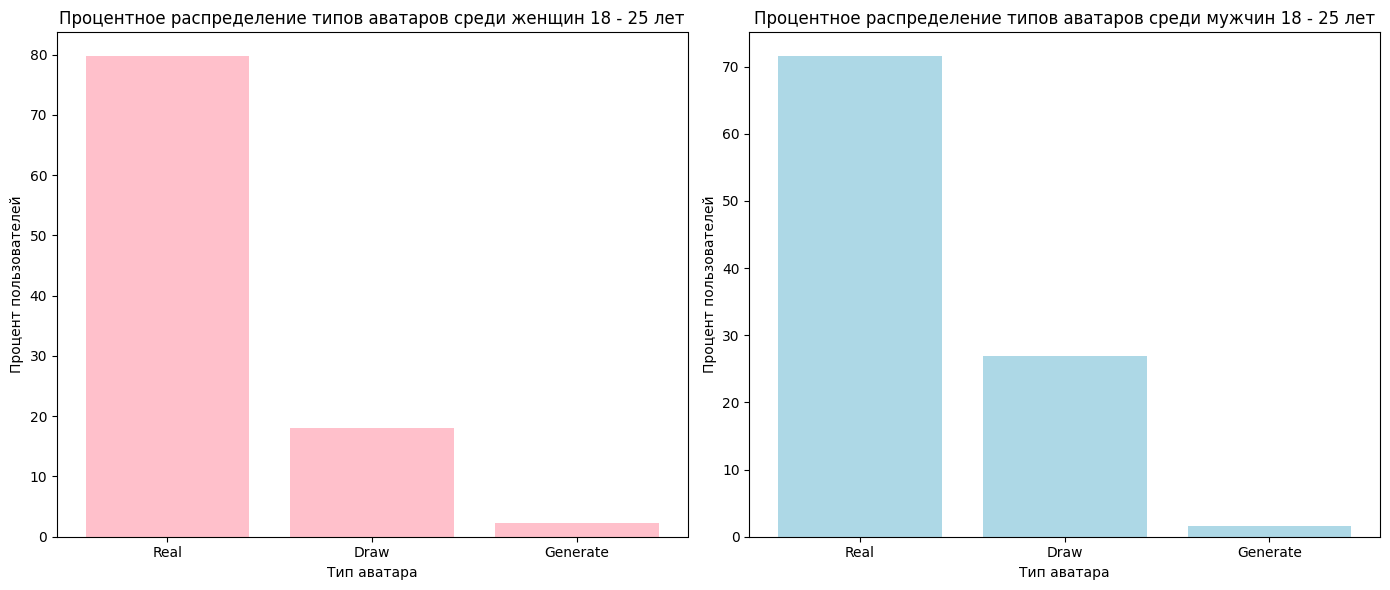

In [ ]:
gender_avatar_counts = {'female': Counter(), 'male': Counter()}

for user_id, user_data in ds_filtered_18_25.items():
    if 'predicted_avatar_class' in user_data and 'sex' in user_data:
        gender = 'female' if user_data['sex'] == 1 else 'male'
        avatar_class = user_data['predicted_avatar_class']
        gender_avatar_counts[gender][avatar_class] += 1

total_female = sum(gender_avatar_counts['female'].values())
total_male = sum(gender_avatar_counts['male'].values())

percent_avatar_gender = {
    'female': {avatar: (count / total_female) * 100 for avatar, count in gender_avatar_counts['female'].items()},
    'male': {avatar: (count / total_male) * 100 for avatar, count in gender_avatar_counts['male'].items()},
}

print("Точное количество пользователей по категориям (с учетом пола):")
for gender, counts in gender_avatar_counts.items():
    print(f"\n{gender.capitalize()}:")
    for avatar, count in counts.items():
        print(f"  {avatar}: {count} пользователей")

print("\nПроцентное распределение пользователей по категориям (с учетом пола):")
for gender, percent_counts in percent_avatar_gender.items():
    print(f"\n{gender.capitalize()}:")
    for avatar, percent in percent_counts.items():
        print(f"  {avatar}: {percent:.2f}% пользователей")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(percent_avatar_gender['female'].keys(), percent_avatar_gender['female'].values(), color='pink')
ax[0].set_title('Процентное распределение типов аватаров среди женщин 18 - 25 лет')
ax[0].set_xlabel('Тип аватара')
ax[0].set_ylabel('Процент пользователей')

ax[1].bar(percent_avatar_gender['male'].keys(), percent_avatar_gender['male'].values(), color='lightblue')
ax[1].set_title('Процентное распределение типов аватаров среди мужчин 18 - 25 лет')
ax[1].set_xlabel('Тип аватара')
ax[1].set_ylabel('Процент пользователей')

plt.tight_layout()
plt.show()

Здесь мы можем наблюдать, что у мужчин больше художественных аватаров чем у женщин, однако так же преобладают реальные фотографии у обоих полов как и в общей выборке.

##Связаны ли достоверные предпочтения с типом образования (техническое, гуманитарное, естественнонаучное образование)?

In [ ]:
json_file_path = 'C:/Users/LazSa/Downloads/NeuralLab1/ds_with_predictions_cleaned.json'

with open(json_file_path, 'r', encoding='utf-8') as f:
    cleaned_data = json.load(f)

Распределение типов образования и аватаров для пользователей 18-25 лет:

Категория образования: Scientific
Draw: 4 пользователей
Generate: 2 пользователей
Real: 9 пользователей


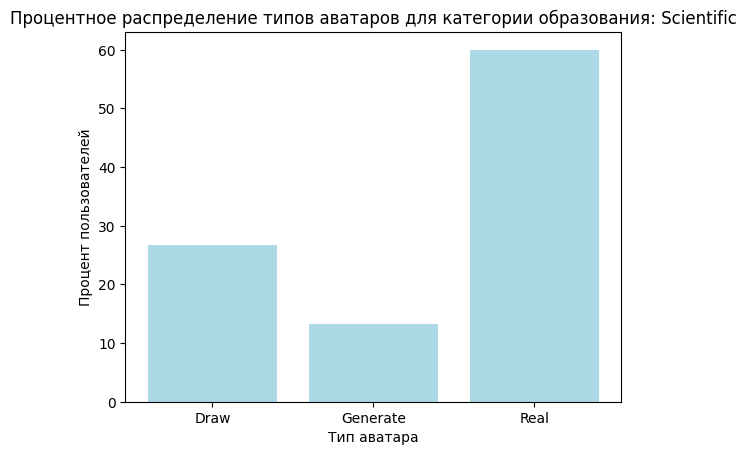


Категория образования: Humanistic
Draw: 7 пользователей
Real: 31 пользователей
Generate: 4 пользователей


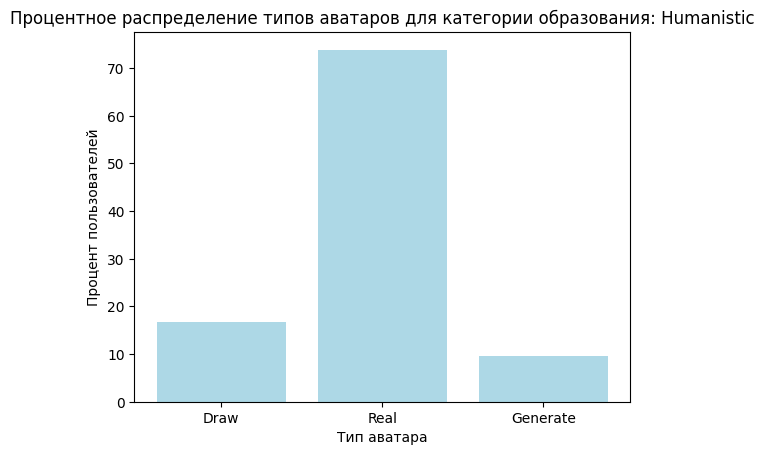


Категория образования: Technic
Real: 11 пользователей
Draw: 6 пользователей


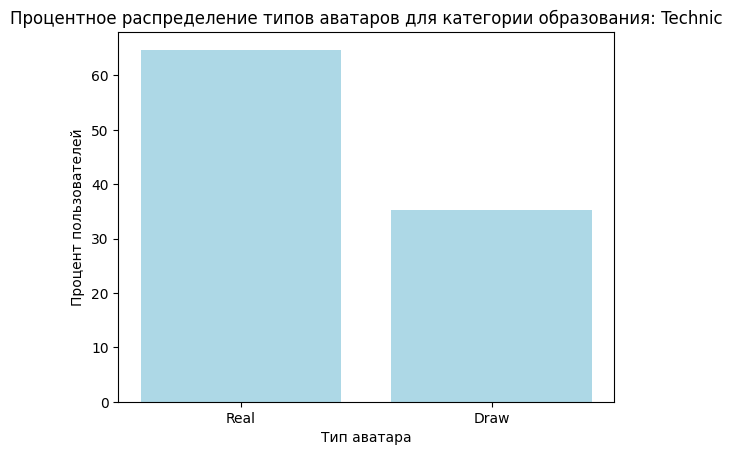

In [ ]:
current_year = datetime.now().year

filtered_data = {}
for user_id, user_data in cleaned_data.items():
    if 'bdate' in user_data:
            birth_year = int(user_data['bdate'].split('.')[-1])
            age = current_year - birth_year
            if 18 <= age <= 25:
                filtered_data[user_id] = user_data

education_avatar_counts = {}
for user_data in filtered_data.values():
    university_class = user_data.get('university_class')
    avatar_class = user_data.get('predicted_avatar_class')

    if university_class and avatar_class:
        if university_class not in education_avatar_counts:
            education_avatar_counts[university_class] = Counter()
        education_avatar_counts[university_class][avatar_class] += 1

print("Распределение типов образования и аватаров для пользователей 18-25 лет:")
for university_class, avatar_counts in education_avatar_counts.items():
    total_users = sum(avatar_counts.values())
    percent_avatar_counts = {avatar: (count / total_users) * 100 for avatar, count in avatar_counts.items()}

    print(f"\nКатегория образования: {university_class}")
    for avatar_class, count in avatar_counts.items():
        print(f"{avatar_class}: {count} пользователей")

    plt.figure()
    plt.bar(percent_avatar_counts.keys(), percent_avatar_counts.values(), color='lightblue')
    plt.xlabel('Тип аватара')
    plt.ylabel('Процент пользователей')
    plt.title(f'Процентное распределение типов аватаров для категории образования: {university_class}')
    plt.show()

В целом выигрывают реальные фотографии. У пользователей с технической специальностью, отсутствуют сгенерированные или обработанные фотографии.